# Transformación de Datos

En esta sección realizaremos una transformación de los datos en base al preprocesado que se nos haya asignado. En nuestro caso es: MinMaxScaler.

In [1]:
## Accederemos a nuestra ruta base para acceder a los datos (USAR SOLO UNA VEZ)
import os

os.chdir("../.")
print(os.getcwd())

c:\Users\ghost\OneDrive\PC_Casa\Ciencia_Datos_IA\2024-2025\2n Cuatri\Introducción a la Ciencia de Datos\Actividades\Portfolio\Practica2


Una vez dentro de nuestra ruta para poder trabajar, importaremos las librerias necesarias para la importación de datos, graficos, y preprocesamiento.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Importaremos nuestros datos:

In [ ]:
dfe = pd.read_csv('./data/interim/estaciones.csv')
dfe.head()

,number,uso_bici,address,lat,lon,total,nombre,coddistrit,codbarrio
0,1,1078,C/GUILLEM DE CASTRO esquina con C/NA JORDANA,39.480042,-0.382929,25,EL CARME,1,3
1,2,1000,Salvador Giner - C. Museo,39.479889,-0.379748,15,EL CARME,1,3
2,3,1204,Plaza del Musico López Chavarri,39.476835,-0.380288,20,EL CARME,1,3
3,4,1401,Plaza de la Virgen - Bailía,39.476747,-0.375342,25,LA SEU,1,1
4,5,996,Plaza Poeta Llorente,39.476895,-0.371140,15,LA XEREA,1,2


Definiremos las variables que queremos estandarizar en variables separadas y posteriormente los escalaremos:

In [43]:
x_feat, y_feat, size = 'lon', 'lat', 'uso_bici'
min_max_scaler = MinMaxScaler() ## Necesitamos establecer que variable actuará de escalador
transf = min_max_scaler.fit(dfe.loc[:, [x_feat, y_feat, size]].values) ## Ajustamos el escalador a los datos
minmax_scaled = transf.fit_transform(dfe[[x_feat, y_feat, size]].values)
df_transf = pd.DataFrame(minmax_scaled, columns=[x_feat, y_feat, size])
df_transf

,lon,lat,uso_bici
0,0.421284,0.652642,0.432237
1,0.452208,0.650161,0.400962
2,0.446958,0.600597,0.482759
3,0.495042,0.599169,0.561748
4,0.535893,0.601571,0.399358
...,...,...,...
268,0.914556,0.662073,0.269848
269,0.904036,0.170034,0.136327
270,0.904853,0.133761,0.086608
271,0.886605,0.202492,0.167602


Este array esta conformado por listas donde cada valor x, y, z se refiere al valor escalado del mismo orden en el que pusimos las variables. Así, la primera lista del array nos dice que el valor que había es para lon: 0.42, para lat: 0.65 y para size: 0.43.

Podemos graficar esto para verlo más facil:

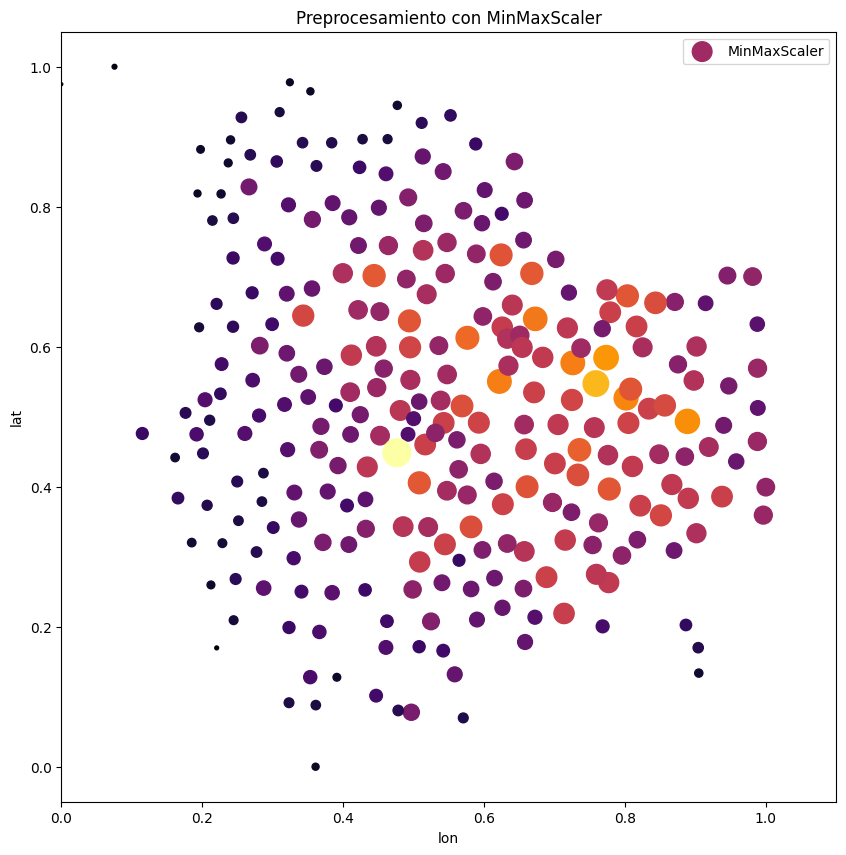

In [39]:
# Crear una figura con un solo subplot
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los datos originales
ax.scatter(minmax_scaled[:, 0], minmax_scaled[:, 1],
                     label='MinMaxScaler', s=(minmax_scaled[:, 2]*400), 
                     c=minmax_scaled[:, 2], cmap='inferno')

ax.set_title('Preprocesamiento con MinMaxScaler')
ax.legend()
ax.set_xlabel(x_feat)
ax.set_ylabel(y_feat)
ax.set_xlim(0, 1.1)

plt.show()

He elegido estos colores puesto que muestran los "puntos calientes" en el uso de bicicletas. Además he ajustado el gráfico a 1.1 en el eje X debido a que hay muchos puntos cercanos al limite del gráfico, lo que lo hace menos atractivo visualmente cuando el eje X está limitado al 1.0. 

Guardaremos esto en un archivo nuevo en la carpeta de processed dentro de data.

In [83]:
df_transf.to_csv('./data/processed/estaciones.csv', index=False)

## Transformación para los datos de uso de bicis

Con esta sección, buscamos saber si la hora del día es un factor que defina el comportamiento del cliente por zona de la ciudad. En nuestro caso revisaremos la zona de Campanar.

In [73]:
df = pd.read_csv('./data/interim/usobarriosmeteo.csv')
# Obtenemos los datos relacionado a campanar y le reseteamos el indice para poder acceder facilmente
df_campanar = df.loc[df['name'].isin(["CAMPANAR"]), :].reset_index(drop=True)

df_campanar

,prec,vmax,vv,hr,ta,tpr,tamin,tamax,fecha,uso_bici,name
0,0.0,2.5,0.9,72.0,6.5,1.9,6.4,7.1,2025-02-03 00:00:00+00:00,8.0,CAMPANAR
1,0.0,2.1,0.5,71.0,6.3,1.5,6.2,6.6,2025-02-03 01:00:00+00:00,0.0,CAMPANAR
2,0.0,2.5,1.1,71.0,6.0,1.1,6.0,6.3,2025-02-03 02:00:00+00:00,0.0,CAMPANAR
3,0.0,2.6,0.4,70.0,5.8,0.9,5.8,6.2,2025-02-03 03:00:00+00:00,1.0,CAMPANAR
4,0.0,2.1,0.5,70.0,5.7,0.6,5.7,5.9,2025-02-03 04:00:00+00:00,0.0,CAMPANAR
...,...,...,...,...,...,...,...,...,...,...,...
668,0.0,8.6,2.0,81.0,14.1,10.9,13.7,14.1,2025-03-03 06:00:00+00:00,2.0,CAMPANAR
669,0.0,9.2,2.1,81.0,14.3,11.1,14.1,14.4,2025-03-03 07:00:00+00:00,5.0,CAMPANAR
670,0.6,9.3,2.2,81.0,14.1,10.9,14.1,14.4,2025-03-03 08:00:00+00:00,10.0,CAMPANAR
671,1.5,8.0,2.3,81.0,14.3,11.1,14.0,14.4,2025-03-03 09:00:00+00:00,8.0,CAMPANAR


Revisaremos los tipos de datos y los transformaremos en caso necesario para poder tratar con los datos del tiempo.

In [75]:
type(df_campanar['fecha'][1])

str

Observamos que es un string, por lo que deberemos transformarlos a datetime para poder trabajar con ellos.

In [76]:
df_campanar["fecha"] = pd.to_datetime(df_campanar["fecha"])

In [77]:
type(df_campanar['fecha'][0])

pandas._libs.tslibs.timestamps.Timestamp

Vemos que ya hemos transformado el tipo de dato al que necesitamos. Ahora necesitamos obtener los datos de hora, dia, mes, año y nombre del dia, para ello usaremos las funciones de pantas para obtenerlo en base al timestamp y crearemos columnas para cada uno de ellos.

In [78]:
df_campanar['hora'] = pd.to_datetime(df_campanar['fecha']).dt.hour # Extraer la hora
df_campanar['dia'] = pd.to_datetime(df_campanar['fecha']).dt.day # Extraer el día
df_campanar['mes'] = pd.to_datetime(df_campanar['fecha']).dt.month # Extraer el mes
df_campanar['anio'] = pd.to_datetime(df_campanar['fecha']).dt.year # Extraer el año
df_campanar['dia_nombre'] = pd.to_datetime(df['fecha']).dt.day_name() # Extraer el nombre del día
# Monday=0, Sunday=6
df_campanar['dia_semana'] = df_campanar['fecha'].dt.day_of_week # Extraer el día de la semana
df_campanar['findesemana'] = np.where(df_campanar['dia_semana']>4, 1, 0) # 1=fin de semana, 0=día laborable

Vemos ahora que hemos obtenido columnas diferentes para cada aspecto que nos interesa sobre el tiempo.

In [79]:
df_campanar

,prec,vmax,vv,hr,ta,tpr,tamin,tamax,fecha,uso_bici,name,hora,dia,mes,anio,dia_nombre,dia_semana,findesemana
0,0.0,2.5,0.9,72.0,6.5,1.9,6.4,7.1,2025-02-03 00:00:00+00:00,8.0,CAMPANAR,0,3,2,2025,Monday,0,0
1,0.0,2.1,0.5,71.0,6.3,1.5,6.2,6.6,2025-02-03 01:00:00+00:00,0.0,CAMPANAR,1,3,2,2025,Monday,0,0
2,0.0,2.5,1.1,71.0,6.0,1.1,6.0,6.3,2025-02-03 02:00:00+00:00,0.0,CAMPANAR,2,3,2,2025,Monday,0,0
3,0.0,2.6,0.4,70.0,5.8,0.9,5.8,6.2,2025-02-03 03:00:00+00:00,1.0,CAMPANAR,3,3,2,2025,Monday,0,0
4,0.0,2.1,0.5,70.0,5.7,0.6,5.7,5.9,2025-02-03 04:00:00+00:00,0.0,CAMPANAR,4,3,2,2025,Monday,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,0.0,8.6,2.0,81.0,14.1,10.9,13.7,14.1,2025-03-03 06:00:00+00:00,2.0,CAMPANAR,6,3,3,2025,Monday,0,0
669,0.0,9.2,2.1,81.0,14.3,11.1,14.1,14.4,2025-03-03 07:00:00+00:00,5.0,CAMPANAR,7,3,3,2025,Monday,0,0
670,0.6,9.3,2.2,81.0,14.1,10.9,14.1,14.4,2025-03-03 08:00:00+00:00,10.0,CAMPANAR,8,3,3,2025,Monday,0,0
671,1.5,8.0,2.3,81.0,14.3,11.1,14.0,14.4,2025-03-03 09:00:00+00:00,8.0,CAMPANAR,9,3,3,2025,Monday,0,0


In [81]:
df_campanar['dia_nombre'].value_counts()

dia_nombre
Monday       106
Tuesday       96
Sunday        96
Saturday      96
Friday        95
Wednesday     94
Thursday      90
Name: count, dtype: int64

In [82]:
df_campanar.to_csv('./data/processed/usobarriosmeteo.csv', index=False)